In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
from sklearn.metrics import precision_score as ps
from sklearn.metrics import recall_score as rs
from sklearn.metrics import f1_score as f1s
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import IPython
import numpy as np
import wave
from sklearn.cluster import KMeans
import os
from PIL import Image
from numpy import asarray
import cv2
from sklearn.decomposition import PCA
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from keras import Input
from keras.models import Sequential,Model
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,AveragePooling2D,GlobalMaxPooling2D,MaxPool2D,UpSampling2D,concatenate,Dropout
from sklearn.metrics import *
from matplotlib import pyplot
from tensorflow.keras.optimizers import Adam
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import preprocessing
from datetime import datetime
import time
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor



In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/PRML Bonus Project Flight Price Prediction/Data (2).csv')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Data Visualisation

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
current_palette = sns.color_palette()
current_palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

Text(0.5, 1.0, 'Count of Airline')

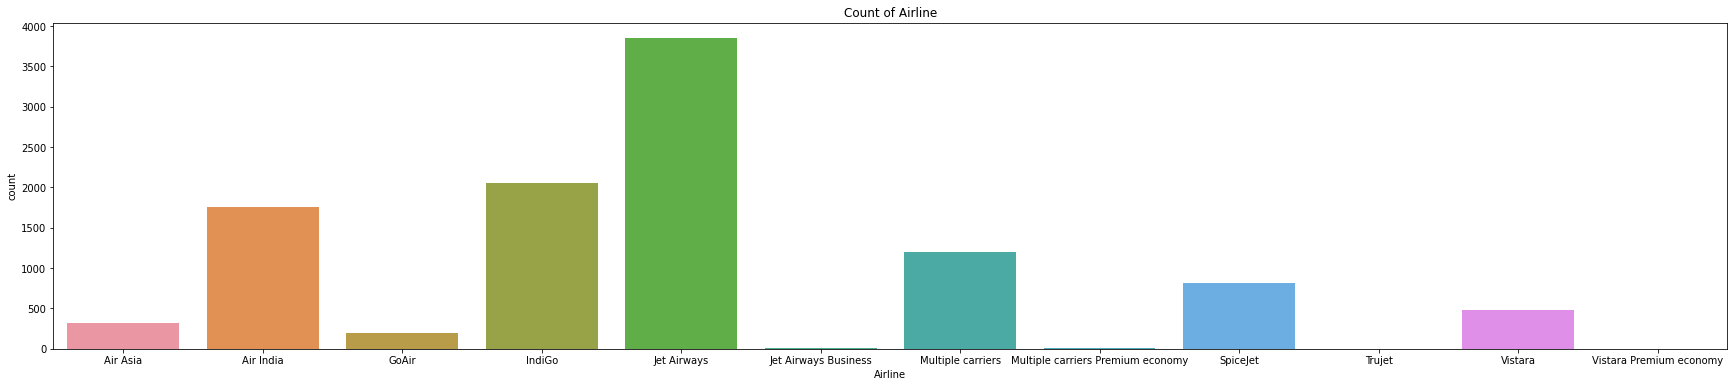

In [ ]:
vals,counts=np.unique(data['Airline'],return_counts=True)
plt.subplots(figsize=(30,6))
sns.barplot(vals,counts)
plt.xlabel('Airline')
plt.ylabel('count')
plt.title('Count of Airline')

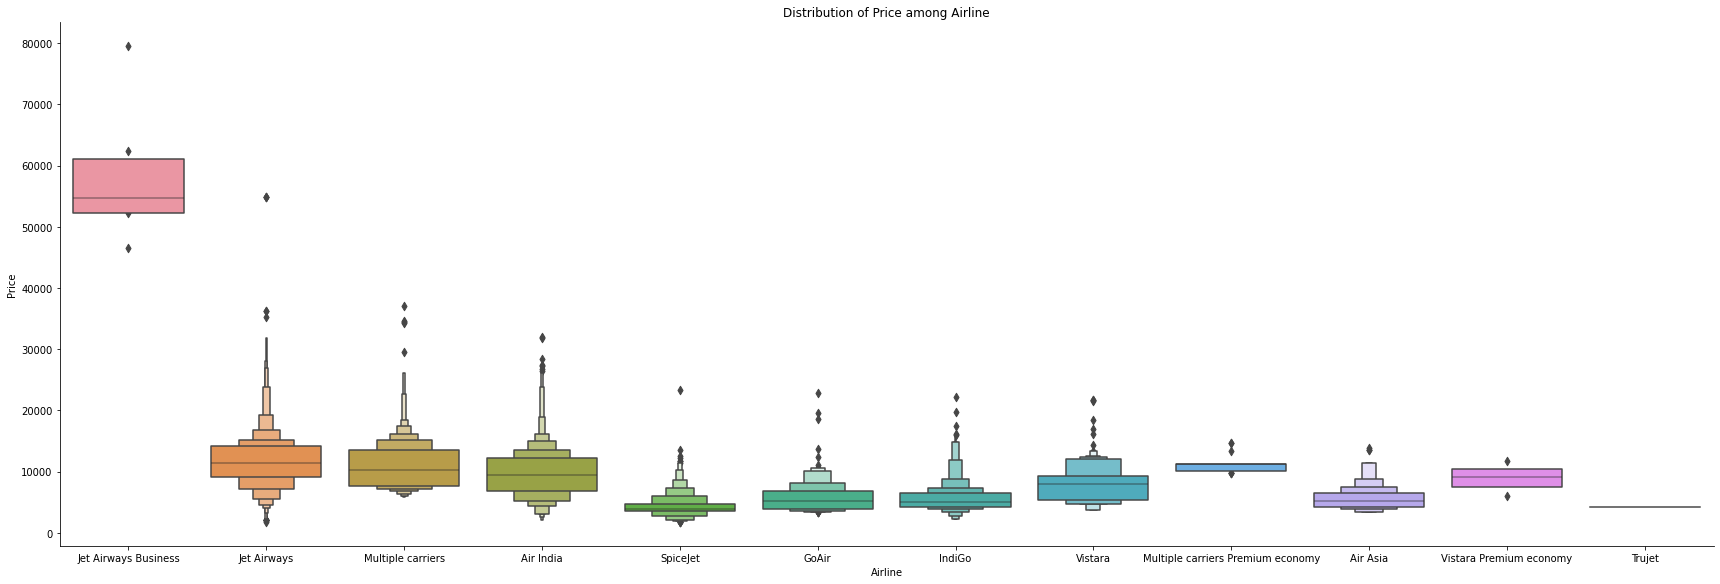

In [ ]:
sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.title('Distribution of Price among Airline')
plt.show()

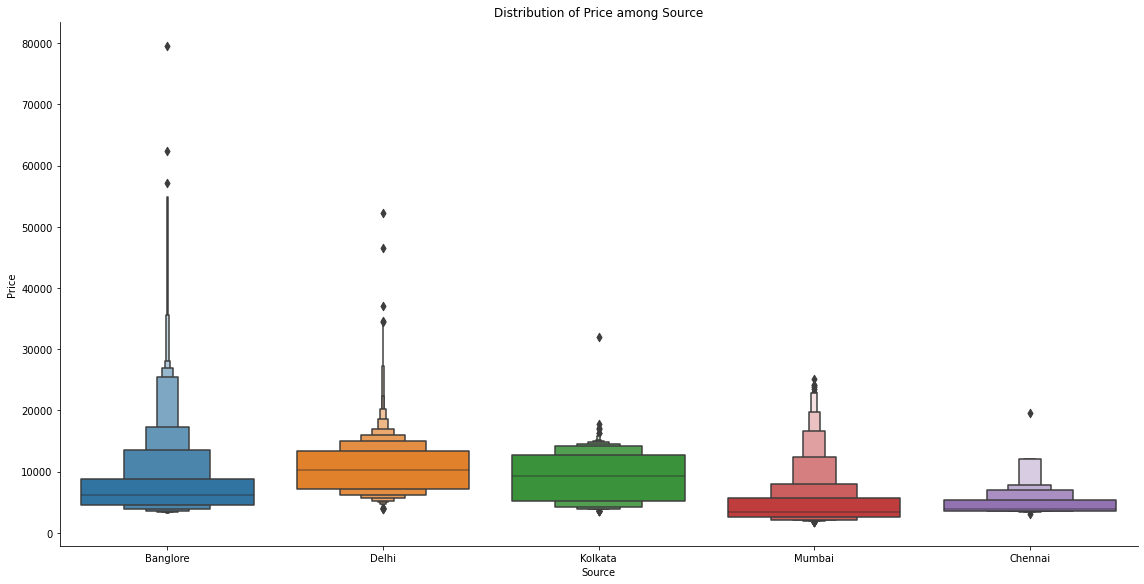

In [ ]:
sns.catplot(y = "Price", x = "Source", data = data.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 2)
plt.title('Distribution of Price among Source')
plt.show()

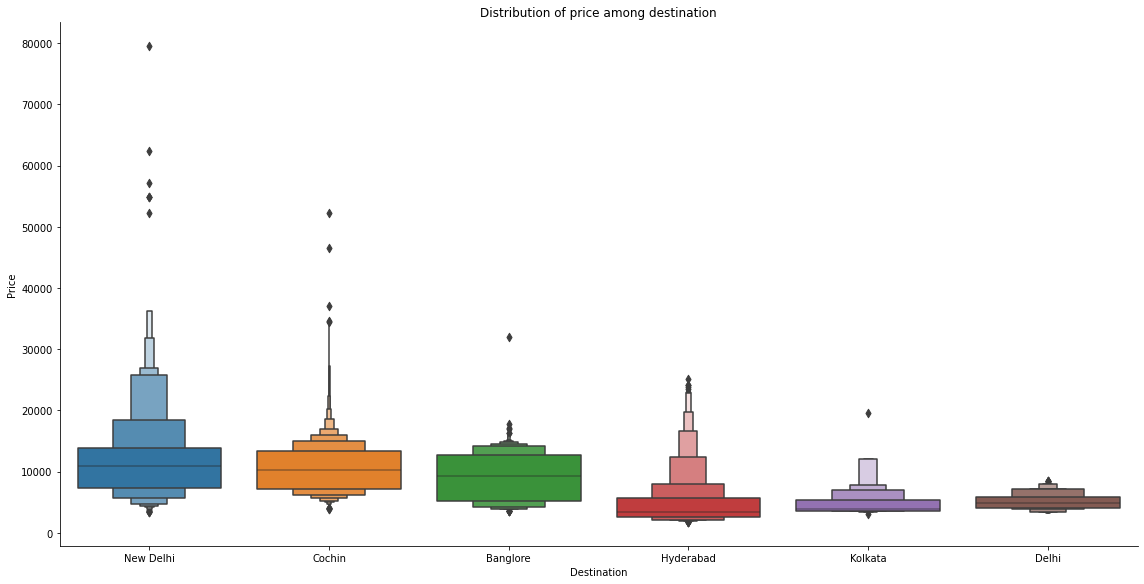

In [ ]:
sns.catplot(y = "Price", x = "Destination", data = data.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 2)
plt.title('Distribution of price among destination')
plt.show()

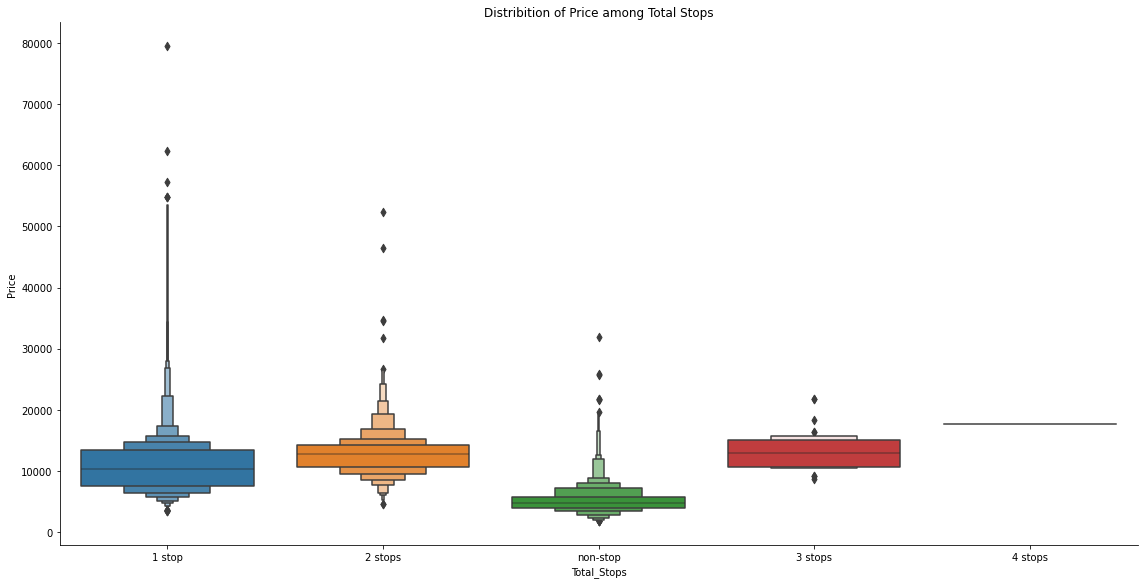

In [ ]:
sns.catplot(y = "Price", x = "Total_Stops", data = data.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 2)
plt.title('Distribition of Price among Total Stops')
plt.show()

In [ ]:
monthWiseFlight=[]
for i in data['Date_of_Journey']:
  lst=list(i.split('/'))
  monthWiseFlight.append(int(lst[1]))

Text(0, 0.5, 'Count of flights')

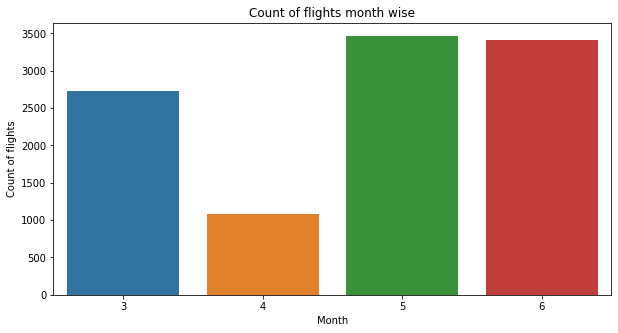

In [ ]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(monthWiseFlight)
plt.xlabel('Month')
plt.ylabel('Count of flights')

Text(0.5, 0, 'Source')

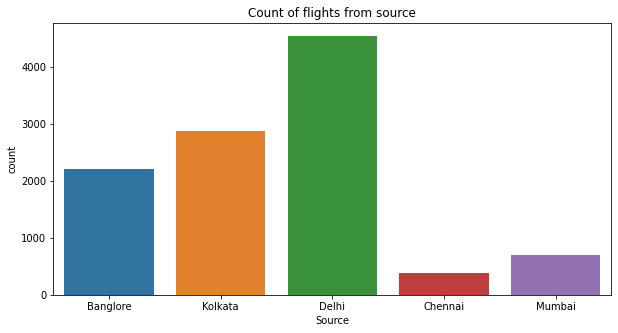

In [ ]:
plt.figure(figsize = (10, 5))
ax=sns.countplot(data['Source'])
plt.title('Count of flights from source')
plt.xlabel('Source')

Text(0.5, 0, 'Destination')

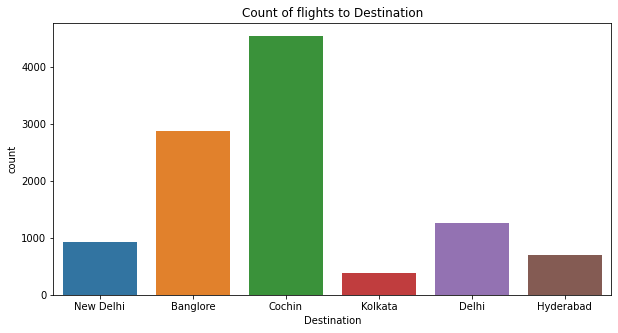

In [ ]:
plt.figure(figsize = (10, 5))
ax=sns.countplot(data['Destination'])
plt.title('Count of flights to Destination')
plt.xlabel('Destination')

## PreProcessing

In [ ]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
data=data.dropna().reset_index(drop=True)
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


### Data Encoding

In [ ]:
vals,counts=np.unique(data['Airline'],return_counts=True)
vals,counts

(array(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
        'Jet Airways Business', 'Multiple carriers',
        'Multiple carriers Premium economy', 'SpiceJet', 'Trujet',
        'Vistara', 'Vistara Premium economy'], dtype=object),
 array([ 319, 1751,  194, 2053, 3849,    6, 1196,   13,  818,    1,  479,
           3]))

In [ ]:
le = preprocessing.LabelEncoder()
le.fit((data['Airline']))
data['Airline']=le.transform((data['Airline']))
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,4,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,3,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,3,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,0,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,1,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,4,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,10,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
airline=le.classes_
airline_encoded=[i for i in range(12)]

In [ ]:
map_airline=dict(zip(airline,airline_encoded))

In [ ]:
map_airline

{'Air Asia': 0,
 'Air India': 1,
 'GoAir': 2,
 'IndiGo': 3,
 'Jet Airways': 4,
 'Jet Airways Business': 5,
 'Multiple carriers': 6,
 'Multiple carriers Premium economy': 7,
 'SpiceJet': 8,
 'Trujet': 9,
 'Vistara': 10,
 'Vistara Premium economy': 11}

In [ ]:
vals,counts=np.unique(data['Source'],return_counts=True)
vals

array(['Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'], dtype=object)

In [ ]:
le = preprocessing.LabelEncoder()
le.fit((data['Source']))
data['Source']=le.transform((data['Source']))
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,0,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,1/05/2019,3,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,4,9/06/2019,2,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,3,12/05/2019,3,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,3,01/03/2019,0,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,0,9/04/2019,3,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,1,27/04/2019,3,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,4,27/04/2019,0,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,10,01/03/2019,0,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
source=le.classes_
source_encoded=[i for i in range(len(np.unique(data['Source'])))]
map_source=dict(zip(source,source_encoded))

In [ ]:
map_source

{'Banglore': 0, 'Chennai': 1, 'Delhi': 2, 'Kolkata': 3, 'Mumbai': 4}

In [ ]:
le = preprocessing.LabelEncoder()
le.fit((data['Destination']))
data['Destination']=le.transform((data['Destination']))
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,1/05/2019,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,4,9/06/2019,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,3,12/05/2019,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,3,01/03/2019,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,0,9/04/2019,3,0,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,1,27/04/2019,3,0,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,4,27/04/2019,0,2,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,10,01/03/2019,0,5,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
destination=le.classes_
destination_encoded=[i for i in range(len(np.unique(data['Destination'])))]
map_destination=dict(zip(destination,destination_encoded))
map_destination

{'Banglore': 0,
 'Cochin': 1,
 'Delhi': 2,
 'Hyderabad': 3,
 'Kolkata': 4,
 'New Delhi': 5}

In [ ]:
data=data.drop(['Route'],axis=1)
data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,0,5,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,1/05/2019,3,0,05:50,13:15,7h 25m,2 stops,No info,7662
2,4,9/06/2019,2,1,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,3,12/05/2019,3,0,18:05,23:30,5h 25m,1 stop,No info,6218
4,3,01/03/2019,0,5,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...
10677,0,9/04/2019,3,0,19:55,22:25,2h 30m,non-stop,No info,4107
10678,1,27/04/2019,3,0,20:45,23:20,2h 35m,non-stop,No info,4145
10679,4,27/04/2019,0,2,08:20,11:20,3h,non-stop,No info,7229
10680,10,01/03/2019,0,5,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
data.loc[data.Total_Stops=="1 stop","Total_Stops"]=1
data.loc[data.Total_Stops=="2 stops","Total_Stops"]=2
data.loc[data.Total_Stops=="3 stops","Total_Stops"]=3
data.loc[data.Total_Stops=="4 stops","Total_Stops"]=4
data.loc[data.Total_Stops=="non-stop","Total_Stops"]=0


In [ ]:
map_total_stops={"1 stop":1, "2 stops": 2, "3 stops": 3, "4 stops": 4, "non-stop":0}

In [ ]:
data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,0,5,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,1,1/05/2019,3,0,05:50,13:15,7h 25m,2,No info,7662
2,4,9/06/2019,2,1,09:25,04:25 10 Jun,19h,2,No info,13882
3,3,12/05/2019,3,0,18:05,23:30,5h 25m,1,No info,6218
4,3,01/03/2019,0,5,16:50,21:35,4h 45m,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...
10677,0,9/04/2019,3,0,19:55,22:25,2h 30m,0,No info,4107
10678,1,27/04/2019,3,0,20:45,23:20,2h 35m,0,No info,4145
10679,4,27/04/2019,0,2,08:20,11:20,3h,0,No info,7229
10680,10,01/03/2019,0,5,11:30,14:10,2h 40m,0,No info,12648


In [ ]:
np.unique(data['Additional_Info'])

array(['1 Long layover', '1 Short layover', '2 Long layover',
       'Business class', 'Change airports', 'In-flight meal not included',
       'No Info', 'No check-in baggage included', 'No info',
       'Red-eye flight'], dtype=object)

In [ ]:
data.loc[data.Additional_Info=="1 Long layover","Additional_Info"]=1
data.loc[data.Additional_Info=="1 Short layover","Additional_Info"]=2
data.loc[data.Additional_Info=="2 Long layover","Additional_Info"]=3
data.loc[data.Additional_Info=="Business class","Additional_Info"]=4
data.loc[data.Additional_Info=="Change airports","Additional_Info"]=5
data.loc[data.Additional_Info=="In-flight meal not included","Additional_Info"]=6
data.loc[data.Additional_Info=="No Info","Additional_Info"]=7
data.loc[data.Additional_Info=="No info","Additional_Info"]=7
data.loc[data.Additional_Info=="No check-in baggage included","Additional_Info"]=8
data.loc[data.Additional_Info=="Red-eye flight","Additional_Info"]=9

In [ ]:
map_additional_info={"Red-eye flight":9,"No check-in baggage included": 8, "No info":7 , "No Info": 7, "In-flight meal not included": 6,"Change airports": 5, "Business class": 4,"2 Long layover": 3,"1 Short layover":2,"1 Long layover":1}
data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,0,5,22:20,01:10 22 Mar,2h 50m,0,7,3897
1,1,1/05/2019,3,0,05:50,13:15,7h 25m,2,7,7662
2,4,9/06/2019,2,1,09:25,04:25 10 Jun,19h,2,7,13882
3,3,12/05/2019,3,0,18:05,23:30,5h 25m,1,7,6218
4,3,01/03/2019,0,5,16:50,21:35,4h 45m,1,7,13302
...,...,...,...,...,...,...,...,...,...,...
10677,0,9/04/2019,3,0,19:55,22:25,2h 30m,0,7,4107
10678,1,27/04/2019,3,0,20:45,23:20,2h 35m,0,7,4145
10679,4,27/04/2019,0,2,08:20,11:20,3h,0,7,7229
10680,10,01/03/2019,0,5,11:30,14:10,2h 40m,0,7,12648


### Handling date and time

In [ ]:
def convert_to_total_seconds(dateHere):
  d = datetime.strptime(dateHere, "%d/%m/%Y")
  return time.mktime(d.timetuple())

In [ ]:
for i in range(len(data['Date_of_Journey'])):
  data['Date_of_Journey'][i]=convert_to_total_seconds(data['Date_of_Journey'].values[i])

In [ ]:
convert_to_total_seconds('13/04/2022')

1649808000.0

In [ ]:
data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,1553385600.0,0,5,22:20,01:10 22 Mar,2h 50m,0,7,3897
1,1,1556668800.0,3,0,05:50,13:15,7h 25m,2,7,7662
2,4,1560038400.0,2,1,09:25,04:25 10 Jun,19h,2,7,13882
3,3,1557619200.0,3,0,18:05,23:30,5h 25m,1,7,6218
4,3,1551398400.0,0,5,16:50,21:35,4h 45m,1,7,13302
...,...,...,...,...,...,...,...,...,...,...
10677,0,1554768000.0,3,0,19:55,22:25,2h 30m,0,7,4107
10678,1,1556323200.0,3,0,20:45,23:20,2h 35m,0,7,4145
10679,4,1556323200.0,0,2,08:20,11:20,3h,0,7,7229
10680,10,1551398400.0,0,5,11:30,14:10,2h 40m,0,7,12648


In [ ]:
def get_sec(time_str):
    h, m = time_str.split(':')
    return int(h) * 3600 + int(m)*60

In [ ]:
for i in range(len(data['Dep_Time'])):
  data['Dep_Time'][i]=get_sec(data['Dep_Time'].values[i])

In [ ]:
data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,1553385600.0,0,5,80400,01:10 22 Mar,2h 50m,0,7,3897
1,1,1556668800.0,3,0,21000,13:15,7h 25m,2,7,7662
2,4,1560038400.0,2,1,33900,04:25 10 Jun,19h,2,7,13882
3,3,1557619200.0,3,0,65100,23:30,5h 25m,1,7,6218
4,3,1551398400.0,0,5,60600,21:35,4h 45m,1,7,13302
...,...,...,...,...,...,...,...,...,...,...
10677,0,1554768000.0,3,0,71700,22:25,2h 30m,0,7,4107
10678,1,1556323200.0,3,0,74700,23:20,2h 35m,0,7,4145
10679,4,1556323200.0,0,2,30000,11:20,3h,0,7,7229
10680,10,1551398400.0,0,5,41400,14:10,2h 40m,0,7,12648


In [ ]:
def get_sec_arrival(time_str):
    lst = list(str(time_str).split(' '))
    lst2 = lst[0].split(':')
    if(len(lst2)==2):
      return int(lst2[0])*3600+int(lst2[1])*60
    else:
      return int(lst2[0])*3600

In [ ]:
for i in range(len(data['Arrival_Time'])):
  data['Arrival_Time'][i]=get_sec_arrival(data['Arrival_Time'].values[i])

In [ ]:
data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,1553385600.0,0,5,80400,4200,2h 50m,0,7,3897
1,1,1556668800.0,3,0,21000,47700,7h 25m,2,7,7662
2,4,1560038400.0,2,1,33900,15900,19h,2,7,13882
3,3,1557619200.0,3,0,65100,84600,5h 25m,1,7,6218
4,3,1551398400.0,0,5,60600,77700,4h 45m,1,7,13302
...,...,...,...,...,...,...,...,...,...,...
10677,0,1554768000.0,3,0,71700,80700,2h 30m,0,7,4107
10678,1,1556323200.0,3,0,74700,84000,2h 35m,0,7,4145
10679,4,1556323200.0,0,2,30000,40800,3h,0,7,7229
10680,10,1551398400.0,0,5,41400,51000,2h 40m,0,7,12648


In [ ]:
def get_sec_duration(time_str):
    lst = list(str(time_str).split(' '))
    if(len(lst)==1):
      return int(lst[0][:-1])*3600 
    else:
      return int(lst[0][:-1])*3600 + int(lst[1][:-1])*60

In [ ]:
for i in range(len(data['Duration'])):
  data['Duration'][i]=get_sec_duration(data['Duration'].values[i])

In [ ]:
data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,1553385600.0,0,5,80400,4200,10200,0,7,3897
1,1,1556668800.0,3,0,21000,47700,26700,2,7,7662
2,4,1560038400.0,2,1,33900,15900,68400,2,7,13882
3,3,1557619200.0,3,0,65100,84600,19500,1,7,6218
4,3,1551398400.0,0,5,60600,77700,17100,1,7,13302
...,...,...,...,...,...,...,...,...,...,...
10677,0,1554768000.0,3,0,71700,80700,9000,0,7,4107
10678,1,1556323200.0,3,0,74700,84000,9300,0,7,4145
10679,4,1556323200.0,0,2,30000,40800,10800,0,7,7229
10680,10,1551398400.0,0,5,41400,51000,9600,0,7,12648


### Min-Max Scaling

In [ ]:
def min_max_scaler(feature):
  max_val=max(list(data[feature]))
  min_val=min(list(data[feature]))
  for i in range(len(data[feature])):
    data[feature][i]=(data[feature].values[i]-min_val)/(max_val-min_val)

In [ ]:
print(min(list(data['Date_of_Journey'])))

1551398400.0


In [ ]:
max(data['Duration'])

171600

In [ ]:
min(data['Duration'])

4500

In [ ]:
min_max_scaler('Date_of_Journey')
min_max_scaler('Dep_Time')
min_max_scaler('Arrival_Time')
min_max_scaler('Duration')
data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,0.194915,0,5,0.932862,0.045455,0.034111,0,7,3897
1,1,0.516949,3,0,0.233216,0.552448,0.132855,2,7,7662
2,4,0.847458,2,1,0.385159,0.181818,0.382406,2,7,13882
3,3,0.610169,3,0,0.75265,0.982517,0.089767,1,7,6218
4,3,0.0,0,5,0.699647,0.902098,0.075404,1,7,13302
...,...,...,...,...,...,...,...,...,...,...
10677,0,0.330508,3,0,0.830389,0.937063,0.02693,0,7,4107
10678,1,0.483051,3,0,0.865724,0.975524,0.028725,0,7,4145
10679,4,0.483051,0,2,0.339223,0.472028,0.037702,0,7,7229
10680,10,0.0,0,5,0.473498,0.590909,0.030521,0,7,12648


In [ ]:
data["Date_of_Journey"] = pd.to_numeric(data["Date_of_Journey"], downcast="float")
data["Arrival_Time"] = pd.to_numeric(data["Arrival_Time"], downcast="float")
data["Duration"] = pd.to_numeric(data["Duration"], downcast="float")
data["Total_Stops"] = pd.to_numeric(data["Total_Stops"], downcast="float")
data["Additional_Info"] = pd.to_numeric(data["Additional_Info"], downcast="float")
data["Dep_Time"] = pd.to_numeric(data["Dep_Time"], downcast="float")


In [ ]:
data.dtypes

Airline              int64
Date_of_Journey    float32
Source               int64
Destination          int64
Dep_Time           float32
Arrival_Time       float32
Duration           float32
Total_Stops        float32
Additional_Info    float32
Price                int64
dtype: object

## Data Visualisation Continued

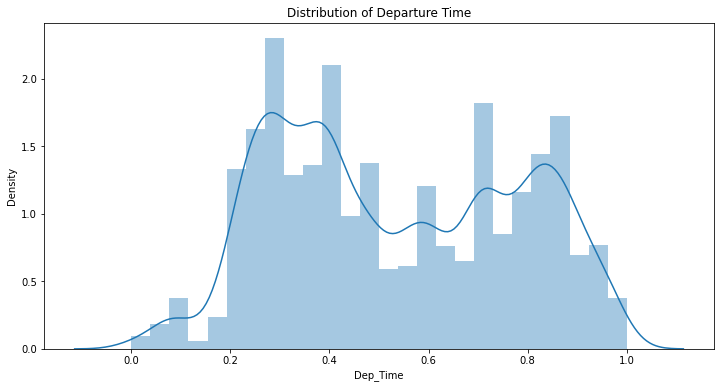

In [ ]:
plt.figure(figsize = (12, 6))
plt.title('Distribution of Departure Time')
sns.distplot(data['Dep_Time'],color=current_palette[0])

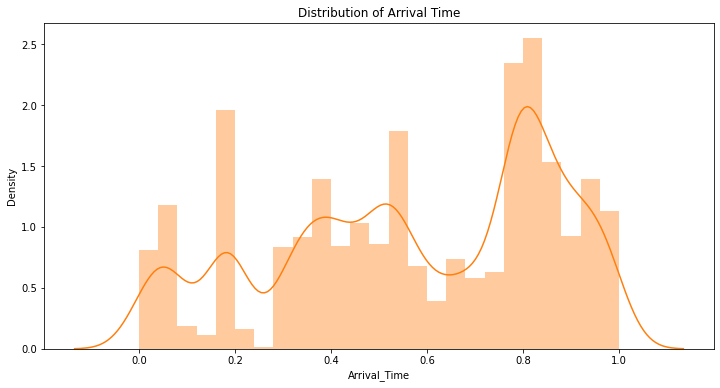

In [ ]:
plt.figure(figsize = (12, 6))
plt.title('Distribution of Arrival Time')
sns.distplot(data['Arrival_Time'],color=current_palette[1])

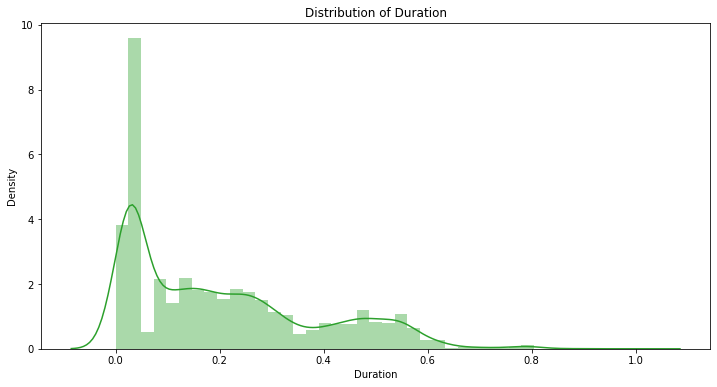

In [ ]:
plt.figure(figsize = (12, 6))
plt.title('Distribution of Duration')
sns.distplot(data['Duration'],color=current_palette[2])

<Figure size 432x288 with 0 Axes>

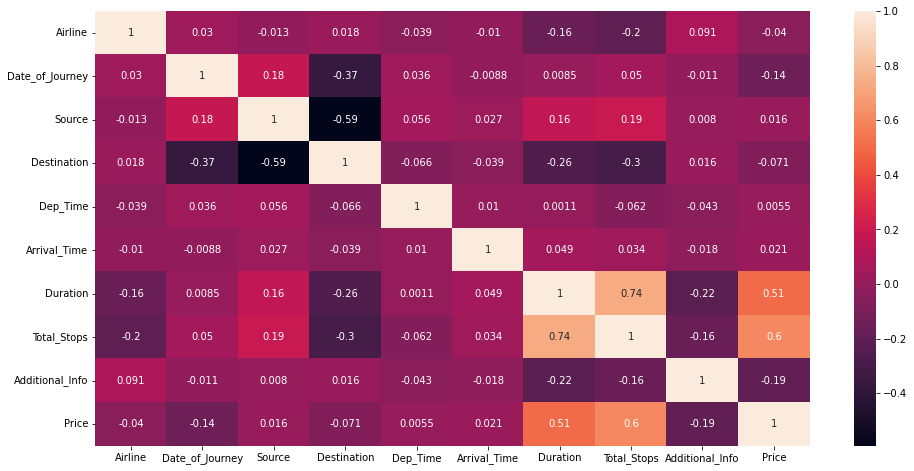

In [ ]:
plt.figure()
plt.subplots(figsize=(16, 8))
sns.heatmap(data.corr(), annot=True)

## Train Test Split

In [ ]:
X=data.drop(['Price'],axis=1)
Y=data['Price']

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(X,Y,train_size=0.7)


x_train

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
10264,1,0.872881,2,1,0.918728,0.804196,0.430880,2.0,7.0
4831,1,0.847458,3,0,0.282686,0.853147,0.262118,1.0,7.0
5425,3,0.610169,1,4,0.922261,0.013986,0.023339,0.0,7.0
9943,3,0.974576,3,0,0.473498,0.587413,0.028725,0.0,7.0
1330,3,0.796610,4,3,0.374558,0.444056,0.005386,0.0,7.0
...,...,...,...,...,...,...,...,...,...
8044,3,0.144068,3,0,0.628975,0.741259,0.028725,0.0,7.0
3498,4,0.711864,3,0,0.392226,0.601399,0.594255,1.0,6.0
3015,4,0.686441,3,0,0.685512,0.192308,0.235189,1.0,7.0
4058,4,0.584746,3,0,0.583039,0.192308,0.287253,1.0,7.0


In [ ]:
y_train

10264    10231
4831     10413
5425      5277
9943      4804
1330      4049
         ...  
8044      4462
3498     10703
3015     14388
4058     13941
2155      7198
Name: Price, Length: 7477, dtype: int64

In [ ]:
x_test

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
166,1,0.016949,4,3,0.575972,0.643357,0.005386,0.0,7.0
10196,3,0.584746,4,3,0.494700,0.562937,0.005386,0.0,7.0
8287,4,0.516949,2,1,0.219081,0.181818,0.466786,2.0,7.0
520,3,0.016949,2,1,0.194346,0.891608,0.326750,2.0,7.0
7241,3,0.584746,0,2,0.346290,0.472028,0.034111,0.0,7.0
...,...,...,...,...,...,...,...,...,...
6426,3,0.661017,0,2,0.766784,0.891608,0.035907,0.0,7.0
505,1,0.737288,4,3,0.879859,0.937063,0.001795,0.0,7.0
3070,4,0.737288,2,1,0.798587,0.524476,0.348294,2.0,7.0
10245,6,0.779661,2,1,0.286219,0.877622,0.272890,1.0,6.0


In [ ]:
y_test

166       6092
10196     4392
8287     15129
520       8899
7241      4823
         ...  
6426      4823
505       3100
3070     15129
10245    10406
3830     16274
Name: Price, Length: 3205, dtype: int64

## Extra Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, Y)

ExtraTreesRegressor()

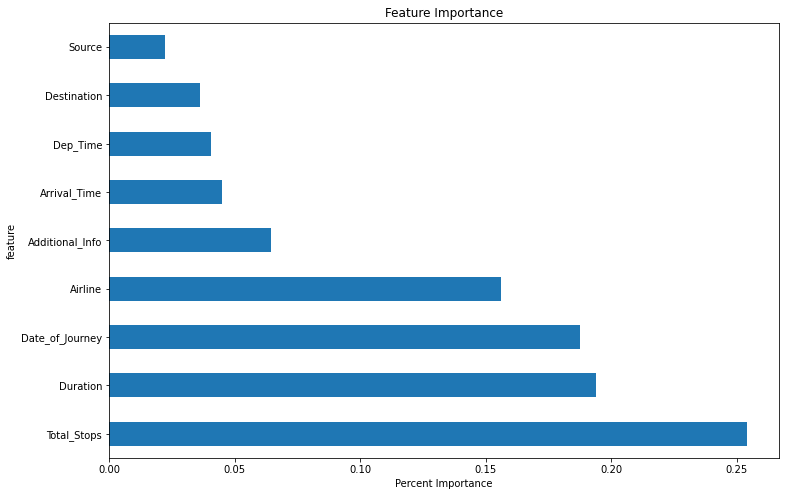

In [ ]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.xlabel('Percent Importance')
plt.ylabel('feature')
plt.title('Feature Importance')
plt.show()

## Decision Tree Regressor

In [ ]:
dtc=DecisionTreeRegressor(random_state=42)
dtc.fit(x_train, y_train)
y_pred_dtc=dtc.predict(x_test)

In [ ]:
dtc_r2_score=r2_score(np.array(y_test), np.array(y_pred_dtc))
dtc_r2_score

0.763884461857921

In [ ]:
dtc_mae=mean_absolute_error(np.array(y_test), np.array(y_pred_dtc))
dtc_mae

777.3052002080084

In [ ]:
dtc_mse=mean_squared_error(np.array(y_test), np.array(y_pred_dtc))
dtc_mse

5223478.629563183

In [ ]:
y_pred_dtc

array([13885.,  2754., 15129., ..., 15129., 10406., 16274.])

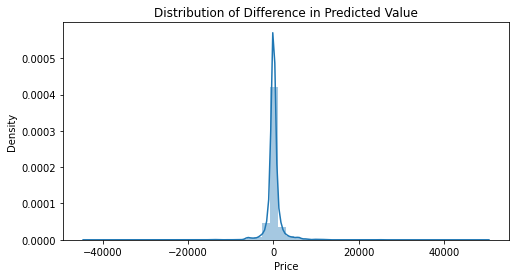

In [ ]:
plt.subplots(figsize=(8, 4))
sns.distplot(y_test-y_pred_dtc)
plt.title('Distribution of Difference in Predicted Value')
plt.show()

## Random Forest Regressor

In [ ]:
tree_para = {"n_estimators":[50,100,200,300,400,450,500,550,600,700]}
clf = GridSearchCV(RandomForestRegressor(random_state=42), tree_para, cv=5)
(clf.fit(x_train, y_train))
y_pred=clf.predict(x_test)
print("Best parameters:", clf.best_params_)

Best parameters: {'n_estimators': 400}


In [ ]:
tree_para = {"max_depth":[2,3,4,5,6,7,8,9]}
clf = GridSearchCV(RandomForestRegressor(random_state=42,n_estimators=400), tree_para, cv=5)
(clf.fit(x_train, y_train))
y_pred=clf.predict(x_test)
print("Best parameters:", clf.best_params_)

Best parameters: {'max_depth': 9}


In [ ]:
tree_para = {"min_samples_split":[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
clf = GridSearchCV(RandomForestRegressor(random_state=42,n_estimators=400,max_depth=9), tree_para, cv=5)
(clf.fit(x_train, y_train))
y_pred=clf.predict(x_test)
print("Best parameters:", clf.best_params_)

Best parameters: {'min_samples_split': 2}


In [ ]:
rfc=RandomForestRegressor(random_state=42,n_estimators=400,max_depth=10,min_samples_split=2)
rfc.fit(x_train,y_train)
y_pred_rfc=rfc.predict(x_test)

In [ ]:
rfc_r2_score = r2_score(np.array(y_test), np.array(y_pred_rfc))
rfc_r2_score

0.8320885831557412

In [ ]:
rfc_mae = mean_absolute_error(np.array(y_test), np.array(y_pred_rfc))
rfc_mae

936.1092118083654

In [ ]:
rfc_mse = mean_squared_error(np.array(y_test), np.array(y_pred_rfc))
rfc_mse

3714629.3058353923

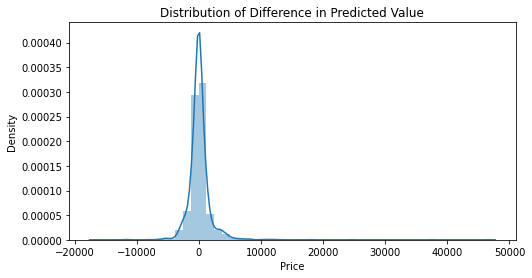

In [ ]:
plt.subplots(figsize=(8, 4))
sns.distplot(y_test-y_pred_rfc)
plt.title('Distribution of Difference in Predicted Value')
plt.show()

## XG Boost Regressor

In [ ]:
tree_para = {"n_estimators":[50,100,200,300,400,450,500,550,600,700]}
clf = GridSearchCV(XGBRegressor(random_state=42), tree_para, cv=5)
(clf.fit(x_train, y_train))
y_pred=clf.predict(x_test)
print("Best parameters:", clf.best_params_)

[10:41:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
tree_para = {"max_depth":[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
clf = GridSearchCV(XGBRegressor(random_state=42,n_estimators=700,), tree_para, cv=5)
(clf.fit(x_train, y_train))
y_pred=clf.predict(x_test)
print("Best parameters:", clf.best_params_)

[10:44:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:44:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:44:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:44:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:44:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:44:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:44:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:44:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
tree_para = {"min_samples_split":[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
clf = GridSearchCV(XGBRegressor(random_state=42,n_estimators=700,max_depth=6), tree_para, cv=5)
(clf.fit(x_train, y_train))
y_pred=clf.predict(x_test)
print("Best parameters:", clf.best_params_)

[10:52:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
XGBModel = XGBRegressor(random_state=42,n_estimators=700,max_depth=6,min_samples_split=2)
XGBModel.fit(x_train,y_train)
y_pred_xgbr = XGBModel.predict(x_test)

[17:31:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgbr_r2_score = r2_score(np.array(y_test), np.array(y_pred_xgbr))
xgbr_r2_score

0.851489986720672

In [ ]:
xgbr_mae=mean_absolute_error(np.array(y_test), np.array(y_pred_xgbr))
xgbr_mae

719.462792473613

In [ ]:
xgbr_mse=mean_squared_error(np.array(y_test), np.array(y_pred_xgbr))
xgbr_mse

3285420.717097935

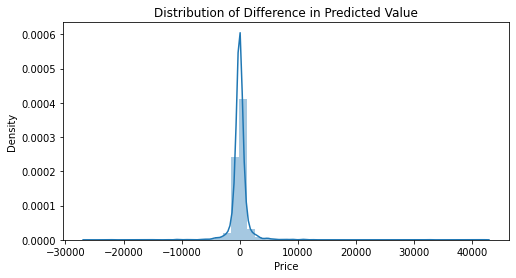

In [ ]:
plt.subplots(figsize=(8, 4))
sns.distplot(y_test-y_pred_xgbr)
plt.title('Distribution of Difference in Predicted Value')
plt.show()

## Light GBM Regressor

In [ ]:
tree_para = {"n_estimators":[100,200,300,400,500,600,700,800,900,1000]}
clf = GridSearchCV(LGBMRegressor(random_state=42), tree_para, cv=5)
(clf.fit(x_train, y_train))
y_pred=clf.predict(x_test)
print("Best parameters:", clf.best_params_)

Best parameters: {'n_estimators': 700}


In [ ]:
tree_para = {"max_depth":[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
clf = GridSearchCV(LGBMRegressor(random_state=42,n_estimators=700,), tree_para, cv=5)
(clf.fit(x_train, y_train))
y_pred=clf.predict(x_test)
print("Best parameters:", clf.best_params_)

Best parameters: {'max_depth': 15}


In [ ]:
tree_para = {"min_samples_split":[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]}
clf = GridSearchCV(LGBMRegressor(random_state=42,n_estimators=700,max_depth=15), tree_para, cv=5)
(clf.fit(x_train, y_train))
y_pred=clf.predict(x_test)
print("Best parameters:", clf.best_params_)

Best parameters: {'min_samples_split': 2}


In [ ]:
lgbm = LGBMRegressor(random_state=42,n_estimators=700,max_depth=15,min_samples_split=2)
lgbm.fit(x_train,y_train)
y_pred_lgbm = lgbm.predict(x_test)

In [ ]:
lgbm_r2_score = r2_score(np.array(y_test), np.array(y_pred_lgbm))
lgbm_r2_score

0.8756516986988021

In [ ]:
lgbm_mae = mean_absolute_error(np.array(y_test), np.array(y_pred_lgbm))
lgbm_mae

739.687519804976

In [ ]:
lgbm_mse = mean_squared_error(np.array(y_test), np.array(y_pred_lgbm))
lgbm_mse

2750901.9507155227

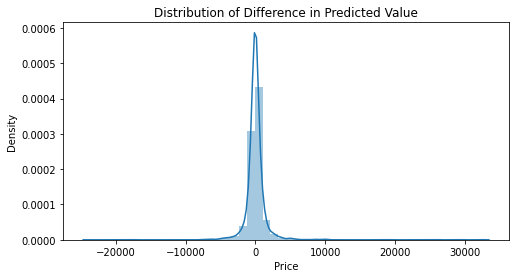

In [ ]:
plt.subplots(figsize=(8, 4))
sns.distplot(y_test-y_pred_lgbm)
plt.title('Distribution of Difference in Predicted Value')
plt.show()

## SVM

In [ ]:
svm = make_pipeline(SVC(gamma='auto'))
svm.fit(x_train, y_train)
y_pred_svm=svm.predict(x_test)

In [ ]:
svm_r2_score = r2_score(np.array(y_test), np.array(y_pred_svm))
svm_r2_score

0.5413707491540307

In [ ]:
svm_mae = mean_absolute_error(np.array(y_test), np.array(y_pred_svm))
svm_mae

1719.1244929797192

In [ ]:
svm_mse = mean_squared_error(np.array(y_test), np.array(y_pred_svm))
svm_mse

10146050.147893915

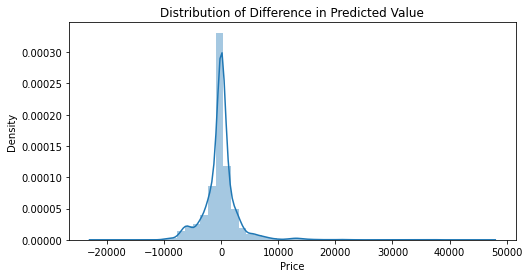

In [ ]:
plt.subplots(figsize=(8, 4))
sns.distplot(y_test-y_pred_svm)
plt.title('Distribution of Difference in Predicted Value')
plt.show()

## Logistic Regression

In [ ]:
lgr = LinearRegression()
lgr.fit(x_train, y_train)
y_pred_lgr=lgr.predict(x_test)

In [ ]:
lgr_r2_score = r2_score(np.array(y_test), np.array(y_pred_lgr))
lgr_r2_score

0.4377395857436972

In [ ]:
lgr_mae = mean_absolute_error(np.array(y_test), np.array(y_pred_lgr))
lgr_mae

2466.073393363479

In [ ]:
lgr_mse = mean_squared_error(np.array(y_test), np.array(y_pred_lgr))
lgr_mse

12438636.106827796

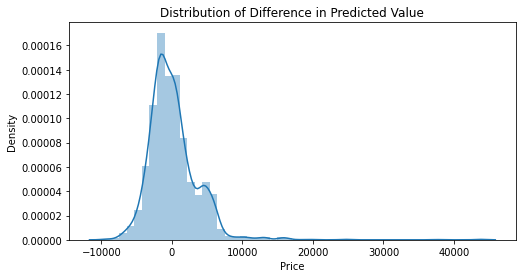

In [ ]:
plt.subplots(figsize=(8, 4))
sns.distplot(y_test-y_pred_lgr)
plt.title('Distribution of Difference in Predicted Value')
plt.show()

## Deep Neural Network

In [ ]:
x_train = tf.cast(x_train, tf.float32) 
y_train=tf.cast(y_train,tf.float32)
x_test = tf.cast(x_test, tf.float32) 
y_test=tf.cast(y_test,tf.float32)

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='relu'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 512)               131584    
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 175,873
Trainable params: 175,873
Non-trai

In [ ]:
history=model.fit(x_train,y_train,epochs=250)

Epoch 1/250
234/234 [==============================] - 3s 6ms/step - loss: 31409510.0000
Epoch 2/250
234/234 [==============================] - 1s 6ms/step - loss: 12641754.0000
Epoch 3/250
234/234 [==============================] - 1s 5ms/step - loss: 11094664.0000
Epoch 4/250
234/234 [==============================] - 1s 4ms/step - loss: 10576627.0000
Epoch 5/250
234/234 [==============================] - 1s 4ms/step - loss: 10272544.0000
Epoch 6/250
234/234 [==============================] - 1s 5ms/step - loss: 9871712.0000
Epoch 7/250
234/234 [==============================] - 2s 7ms/step - loss: 9438401.0000
Epoch 8/250
234/234 [==============================] - 2s 7ms/step - loss: 9114657.0000
Epoch 9/250
234/234 [==============================] - 2s 7ms/step - loss: 8713148.0000
Epoch 10/250
234/234 [==============================] - 2s 7ms/step - loss: 8396295.0000
Epoch 11/250
234/234 [==============================] - 1s 6ms/step - loss: 8010749.5000
Epoch 12/250
234/234 [===

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,epoch
245,2785176.00,245
246,2530782.00,246
247,2534328.25,247
248,2607496.00,248
249,2627527.75,249


Text(0.5, 1.0, 'Loss variation with epochs')

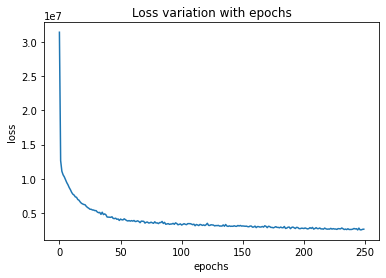

In [ ]:
plt.plot(hist['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss variation with epochs')

In [ ]:
y_pred_dnn=model.predict(x_test)

In [ ]:
dnn_r2_score = r2_score(y_pred_dnn,y_test)
dnn_r2_score

0.8337371479840411

In [ ]:
dnn_mae = mean_absolute_error(y_pred_dnn,y_test)
dnn_mae

1145.4578

In [ ]:
dnn_mse = mean_squared_error(y_pred_dnn,y_test)
dnn_mse

3568361.0

In [ ]:
model.save("flightPrediction.h5")

In [ ]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format keras '/content/flightPrediction.h5' '/content/flightPrediction'

     |████████████████████████████████| 77 kB 5.2 MB/s 
     |████████████████████████████████| 462 kB 30.5 MB/s 


## Comparitive Analysis

Text(0.5, 1.0, 'Comparision of r2_score for different models')

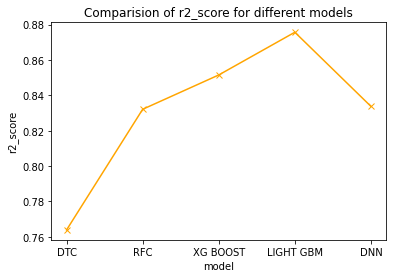

In [ ]:
plt.plot(['DTC','RFC','XG BOOST','LIGHT GBM','DNN'],[dtc_r2_score,rfc_r2_score,xgbr_r2_score,lgbm_r2_score,dnn_r2_score],marker='x',color='orange')
plt.xlabel('model')
plt.ylabel('r2_score')
plt.title('Comparision of r2_score for different models')

Text(0.5, 1.0, 'Comparision of Mean Absolute Error for different models')

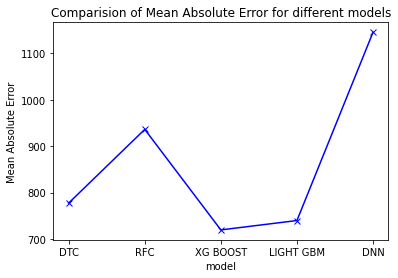

In [ ]:
plt.plot(['DTC','RFC','XG BOOST','LIGHT GBM','DNN'],[dtc_mae,rfc_mae,xgbr_mae,lgbm_mae,dnn_mae],marker='x',color='blue')
plt.xlabel('model')
plt.ylabel('Mean Absolute Error')
plt.title('Comparision of Mean Absolute Error for different models')

Text(0.5, 1.0, 'Comparision of Mean Squared Error for different models')

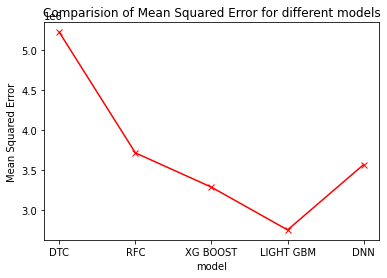

In [ ]:
plt.plot(['DTC','RFC','XG BOOST','LIGHT GBM','DNN'],[dtc_mse,rfc_mse,xgbr_mse,lgbm_mse,dnn_mse],marker='x',color='red')
plt.xlabel('model')
plt.ylabel('Mean Squared Error')
plt.title('Comparision of Mean Squared Error for different models')